Isha Pendharkar




Maanav Bhavsar

# Installations and Inputs

Installation of hugging face transformers

In [ ]:
 !pip install -q transformers
 !pip install -q youtube_transcript_api
 !pip install spacy
 !python -m spacy download en_core_web_sm
 !pip install youtube-dl
 !pip install ibm_watson
 !apt install ffmpeg
 !pip install SpeechRecognition
 !pip install pydub

     |████████████████████████████████| 4.0 MB 22.2 MB/s 
     |████████████████████████████████| 6.6 MB 54.8 MB/s 
     |████████████████████████████████| 596 kB 61.9 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
     |████████████████████████████████| 895 kB 44.7 MB/s 
     |████████████████████████████████| 12.0 MB 22.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 1.9 MB 20.2 MB/s 
     |████████████████████████████████| 338 kB 26.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 138 kB 51.9 MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-6.0.0-py3-none-any.whl size=336807

youtube_transcript_api is a python API which allows you to get the transcript/subtitles for a given YouTube video. It also works for automatically generated subtitles, supports translating subtitles. So we shall be using it for extraction of subtitles which we will be needing.

Pipeline can be used for text summarisation

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi
from IPython.display import YouTubeVideo
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

# Loading Video and Transcript(API method)

Storing value of the URL of the video in a variable called youtube_video

In [ ]:
youtube_video = "https://www.youtube.com/watch?v=BmYv8XGl-YU"

Here we are seperating the two elements of the above link. Video ID is after '=' sign so we split it there. Now we can input whichever video link we want and run program for different videos from which ID of given video will be extracted, hence index value in below line is 1 i.e. value in link after '='.

In [ ]:
video_id = youtube_video.split("=")[1]
video_id

'BmYv8XGl-YU'

This function takes the ID of video and displays it

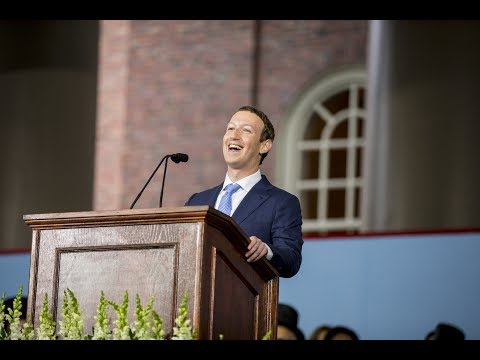

In [ ]:
YouTubeVideo(video_id)

Now we proceed to get the entire transcript of the youtube video by use of the previously installed youtube_transcript_api

In [ ]:
transcript = YouTubeTranscriptApi.get_transcript(video_id)
transcript

[{'duration': 9.78,
  'start': 30.65,
  'text': 'President Faust, Board of Overseers, faculty,\nalumni, friends, proud parents, members of'},
 {'duration': 14.93,
  'start': 40.43,
  'text': 'the ad board, and graduates of the greatest\nuniversity in the world,'},
 {'duration': 5.3,
  'start': 55.36,
  'text': "I'm honored to be with you today because,\nlet's face it, you accomplished something"},
 {'duration': 3.53, 'start': 60.66, 'text': 'I never could.'},
 {'duration': 5.64,
  'start': 64.19,
  'text': "If I get through this speech, it'll be the\nfirst time I actually finish something at"},
 {'duration': 1.43, 'start': 69.83, 'text': 'Harvard.'},
 {'duration': 5.31, 'start': 71.26, 'text': 'Class of 2017, congratulations!'},
 {'duration': 10.08,
  'start': 76.57,
  'text': "I'm an unlikely speaker, not just because\nI dropped out, but because we're technically"},
 {'duration': 2.75, 'start': 86.65, 'text': 'in the same generation.'},
 {'duration': 5.61,
  'start': 89.4,
  'text': '

Separating the transcript data out to only get the required captions of the video by using for loop.

In [ ]:
result = ""
for i in transcript:
    result += ' ' + i['text']
print(result)

 President Faust, Board of Overseers, faculty,
alumni, friends, proud parents, members of the ad board, and graduates of the greatest
university in the world, I'm honored to be with you today because,
let's face it, you accomplished something I never could. If I get through this speech, it'll be the
first time I actually finish something at Harvard. Class of 2017, congratulations! I'm an unlikely speaker, not just because
I dropped out, but because we're technically in the same generation. We walked this yard less than a decade apart,
studied the same ideas and slept through the same Ec10 lectures. We may have taken different paths to get here,
especially if you came all the way from the Quad, but today I want to share what I've
learned about our generation and the world we're building together. But first, the last couple of days have brought
back a lot of good memories. How many of you remember exactly what you
were doing when you got that email telling you that you got into Harvard? 

In [ ]:
print(len(result))

19758


# Importing transcript: Audio-file method method


In [ ]:
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence

Downloading the required youtube video on the system

In [ ]:
!youtube-dl https://www.youtube.com/watch?v=BmYv8XGl-YU

[youtube] BmYv8XGl-YU: Downloading webpage
[download] Facebook Founder Mark Zuckerberg Commencement Address _ Harvard Commencement 2017-BmYv8XGl-YU.mp4 has already been downloaded and merged


Converting the video to an audio file

In [ ]:
import subprocess
command = 'ffmpeg -i speech_file.mp4 -ab 160k -ar 44100 -vn audio.mp4'
subprocess.call(command, shell=True)

1

Creating a speech recognition object

In [ ]:
r = sr.Recognizer()

Due to the large size of the audio file, define a function to split the file into managable chunks.


Next, apply sppech recognition on these creted chunks so they can be transcribed.

In [ ]:
def get_large_audio_transcription(path):
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.mp4")
        audio_chunk.export(chunk_filename, format="mp4")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened)
            except sr.UnknownValueError as e:
                print("Error:", str(e))
            else:
                text = f"{text.capitalize()}. "
                print(chunk_filename, ":", text)
                whole_text += text
    # return the text for all chunks detected
    return whole_text

Input the path of the audio file and implement the "get_large_audio_transcription" function

In [ ]:
path = "/content/Facebook Founder Mark Zuckerberg Commencement Address _ Harvard Commencement 2017-BmYv8XGl-YU.mp4"
full_text = get_large_audio_transcription(path)
print("\nFull text:", full_text)

In [ ]:
full_text

In [ ]:
print(len(full_text))

# Method 1 (Using a predefined pipeline)

Initializing the pipeline for summarization and saving the model.

By defaut this pipeline will make use of BART model

In [ ]:
summarize = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

We can directly use the model and start summarising, but it might not work as we have a very large text input here.


So to make it more convenient and for the model to work well, we will make chunks out of our text file and then feed them into the model.

In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarize(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 President Faust, Board of Overseers, faculty,
alumni, friends, proud parents, members of the ad board, and graduates of the greatest
university in the world, I'm honored to be with you today because,
let's face it, you accomplished something I never could. If I get through this speech, it'll be the
first time I actually finish something at Harvard. Class of 2017, congratulations! I'm an unlikely speaker, not just because
I dropped out, but because we're technically in the same generation. We walked this yard less than a decade apart,
studied the same ideas and slept through the same Ec10 lectures. We may have taken different paths to get here,
especially if you came all the way from the Quad, but today I want to share what I've
learned about our generation and the world we're building together. But first, the last couple of days have brought
back a lot of good memories. How many of you remember exactly what you
were doing when you got that email telling you that you got in

In [ ]:
len(str(summarized_text))

6868

In [ ]:
str(summarized_text)

'[" Class of 2017, congratulations! I\'m an unlikely speaker, not just because I dropped out, but because we\'re technically in the same generation . President Faust, Board of Overseers, faculty, alumni, proud parents, members of the ad board, and graduates of the greatest university in the world, I\'m honored to be with you today .", " I swear getting into Harvard is still the thing my parents are most proud of me for . My best memory from Harvard was meeting Priscilla. I was late so I threw on a t-shirt inside out and backwards with my tag sticking out the front. I couldn\'t figure out why no one would talk to me -- except one guy, KX Jin, he just went with it. We ended up doing our problem sets together, and now he runs a big part of Facebook.", " Harvard commencement speaker says he met Priscilla at Facemash party in line for bathroom in Pfoho. y party . He says it was the most important thing he built in his time at the university . He\'s so grateful to Harvard for starting lifelo

# Method 2: Word Frequency algorithm

Steps:



1.   Text cleaning
2.   Sentence tokenization
3.   Word tokenization
4.   Word-frequency table
5.   Summarization



In [ ]:
stopwords = list(STOP_WORDS)

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(result)

In [ ]:
tokens = [token.text for token in doc]
print(tokens)

[' ', 'President', 'Faust', ',', 'Board', 'of', 'Overseers', ',', 'faculty', ',', '\n', 'alumni', ',', 'friends', ',', 'proud', 'parents', ',', 'members', 'of', 'the', 'ad', 'board', ',', 'and', 'graduates', 'of', 'the', 'greatest', '\n', 'university', 'in', 'the', 'world', ',', 'I', "'m", 'honored', 'to', 'be', 'with', 'you', 'today', 'because', ',', '\n', 'let', "'s", 'face', 'it', ',', 'you', 'accomplished', 'something', 'I', 'never', 'could', '.', 'If', 'I', 'get', 'through', 'this', 'speech', ',', 'it', "'ll", 'be', 'the', '\n', 'first', 'time', 'I', 'actually', 'finish', 'something', 'at', 'Harvard', '.', 'Class', 'of', '2017', ',', 'congratulations', '!', 'I', "'m", 'an', 'unlikely', 'speaker', ',', 'not', 'just', 'because', '\n', 'I', 'dropped', 'out', ',', 'but', 'because', 'we', "'re", 'technically', 'in', 'the', 'same', 'generation', '.', 'We', 'walked', 'this', 'yard', 'less', 'than', 'a', 'decade', 'apart', ',', '\n', 'studied', 'the', 'same', 'ideas', 'and', 'slept', 'thr

In [ ]:
punctuation = punctuation + '\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [ ]:
word_frequencies = {}
for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1

In [ ]:
word_frequencies

{' ': 1,
 '--': 15,
 '10': 1,
 '12': 1,
 '121': 1,
 '17': 1,
 '2017': 3,
 '22': 1,
 '300,000': 1,
 '50x': 1,
 'Actually': 1,
 'Agnes': 2,
 'American': 1,
 'Aznar': 1,
 'Belltower': 1,
 'Beyonce': 1,
 'Board': 1,
 'Boys': 2,
 'Chan': 1,
 'Change': 1,
 'Church': 1,
 'City': 1,
 'Civilization': 1,
 'Class': 4,
 'Club': 2,
 'Computer': 1,
 'Congratulations': 1,
 'David': 2,
 'Deal': 1,
 'Ec10': 1,
 'F': 1,
 'Facebook': 7,
 'Facemash': 3,
 'Faust': 1,
 'Feed': 1,
 'Forces': 1,
 'Francisco': 1,
 'GDP': 1,
 'Girls': 2,
 'Good': 1,
 'Great': 1,
 'Halo': 1,
 'Harry': 2,
 'Harvard': 8,
 'Hoover': 1,
 'House': 1,
 "I\\'92ve": 1,
 'Ideas': 1,
 'Igoye': 1,
 'Initiative': 1,
 'Instead': 1,
 'JK': 1,
 'Jain': 1,
 'Jin': 1,
 'John': 1,
 'KX': 2,
 'Kayla': 2,
 'Kennedy': 2,
 'Kirkland': 1,
 'Latin': 1,
 'Let': 4,
 'Lewis': 1,
 'Look': 1,
 'Maybe': 1,
 'Membership': 1,
 'Memorial': 1,
 'Mexico': 1,
 'Mi': 1,
 'Millennials': 1,
 'Millions': 2,
 'Movies': 1,
 'Mr.': 1,
 'NASA': 1,
 'Nearly': 1,
 'New': 1,

In [ ]:
max_frequency = max(word_frequencies.values())
max_frequency

27

In [ ]:
for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max_frequency

In [ ]:
word_frequencies

{' ': 0.037037037037037035,
 '--': 0.5555555555555556,
 '10': 0.037037037037037035,
 '12': 0.037037037037037035,
 '121': 0.037037037037037035,
 '17': 0.037037037037037035,
 '2017': 0.1111111111111111,
 '22': 0.037037037037037035,
 '300,000': 0.037037037037037035,
 '50x': 0.037037037037037035,
 'Actually': 0.037037037037037035,
 'Agnes': 0.07407407407407407,
 'American': 0.037037037037037035,
 'Aznar': 0.037037037037037035,
 'Belltower': 0.037037037037037035,
 'Beyonce': 0.037037037037037035,
 'Board': 0.037037037037037035,
 'Boys': 0.07407407407407407,
 'Chan': 0.037037037037037035,
 'Change': 0.037037037037037035,
 'Church': 0.037037037037037035,
 'City': 0.037037037037037035,
 'Civilization': 0.037037037037037035,
 'Class': 0.14814814814814814,
 'Club': 0.07407407407407407,
 'Computer': 0.037037037037037035,
 'Congratulations': 0.037037037037037035,
 'David': 0.07407407407407407,
 'Deal': 0.037037037037037035,
 'Ec10': 0.037037037037037035,
 'F': 0.037037037037037035,
 'Facebook': 0.

In [ ]:
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

[ President Faust, Board of Overseers, faculty,
alumni, friends, proud parents, members of the ad board, and graduates of the greatest
university in the world, , I'm honored to be with you today, because,
let's face it, you accomplished something I never could., If I get through this speech, it'll be the
first time I actually finish something at Harvard., Class of 2017, congratulations!, I'm an unlikely speaker, not just because
I dropped out, but because we're technically in the same generation., We walked this yard less than a decade apart,
studied the same ideas and slept through the same Ec10 lectures., We may have taken different paths to get here,
especially if you came all the way from the Quad, but today I want to share what I've
learned about our generation and the world we're building together., But first, the last couple of days have brought
back a lot of good memories., How many of you remember exactly what you
were doing when you got that email telling you that you got int

In [ ]:
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]

In [ ]:
sentence_scores

{ President Faust, Board of Overseers, faculty,
 alumni, friends, proud parents, members of the ad board, and graduates of the greatest
 university in the world: 1.7407407407407405,
 , I'm honored to be with you today: 0.37037037037037035,
 because,
 let's face it, you accomplished something I never could.: 0.3333333333333333,
 If I get through this speech, it'll be the
 first time I actually finish something at Harvard.: 0.7037037037037035,
 Class of 2017, congratulations!: 0.25925925925925924,
 I'm an unlikely speaker, not just because
 I dropped out, but because we're technically in the same generation.: 0.6296296296296295,
 We walked this yard less than a decade apart,
 studied the same ideas and slept through the same Ec10 lectures.: 0.5185185185185185,
 We may have taken different paths to get here,
 especially if you came all the way from the Quad, but today I want to share what I've
 learned about our generation and the world we're building together.: 2.6296296296296293,
 But f

In [ ]:
from heapq import nlargest

In [ ]:
select_length = int(len(sentence_tokens)*1.0)
select_length

283

In [ ]:
summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)

In [ ]:
summary

[Today I want to talk about three ways to create
 a world where everyone has a sense of purpose: by taking on big meaningful projects together,
 by redefining equality so everyone has the freedom to pursue purpose, and by building
 community across the world., In our generation, the struggle of whether
 we connect more, whether we achieve our biggest opportunities, comes down to this -- your
 ability to build communities and create a world where every single person has a sense
 of purpose., To keep our society moving forward, we have
 a generational challenge -- to not only create new jobs, but create a renewed sense of purpose., Let's give everyone the freedom to pursue
 their purpose -- not only because it's the right thing to do, but because when more people
 can turn their dreams into something great, we're all better for it., These projects didn't just provide purpose
 for the people doing those jobs, they gave our whole country a sense of pride that we
 could do great things., So

In [ ]:
listToStr_summary = ' '.join([str(elem) for elem in summary])
  
print(listToStr_summary) 

Today I want to talk about three ways to create
a world where everyone has a sense of purpose: by taking on big meaningful projects together,
by redefining equality so everyone has the freedom to pursue purpose, and by building
community across the world. In our generation, the struggle of whether
we connect more, whether we achieve our biggest opportunities, comes down to this -- your
ability to build communities and create a world where every single person has a sense
of purpose. To keep our society moving forward, we have
a generational challenge -- to not only create new jobs, but create a renewed sense of purpose. Let's give everyone the freedom to pursue
their purpose -- not only because it's the right thing to do, but because when more people
can turn their dreams into something great, we're all better for it. These projects didn't just provide purpose
for the people doing those jobs, they gave our whole country a sense of pride that we
could do great things. So taking on big me

# Text to Speech

In [ ]:
# !pip install gTTS

In [ ]:
from gtts import gTTS
  
# This module is imported so that we can 
# play the converted audio
import os
  
# The text that you want to convert to audio
  
# Language in which you want to convert
language = 'en'
  
# Passing the text and language to the engine, 
# here we have marked slow=False. Which tells 
# the module that the converted audio should 
# have a high speed
myobj = gTTS(text=listToStr_summary, lang=language, slow=False)
  
# Saving the converted audio in a mp3 file named
# welcome 
myobj.save("mark.mp3")
  
# Playing the converted file
os.system("mpg321 mark.mp3")

# Evaluation Metric

In [ ]:
pip install rouge

In [ ]:
from rouge import Rouge
a = result
b = listToStr_summary

rouge = Rouge()
rouge_score = rouge.get_scores(a, b)
print(rouge_score[0]["rouge-1"])
print(rouge_score[0]["rouge-2"])
print(rouge_score[0]["rouge-l"])

{'r': 0.9955985915492958, 'p': 0.9903677758318739, 'f': 0.9929762899956449}
{'r': 0.9175879396984925, 'p': 0.9105718085106383, 'f': 0.9140664058126884}
{'r': 0.9955985915492958, 'p': 0.9903677758318739, 'f': 0.9929762899956449}


### **Rouge-1 Evaluation Metrics**

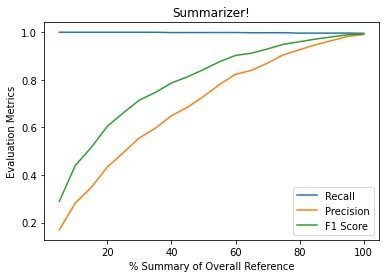

In [ ]:
import matplotlib.pyplot as plt
 
# line 1 points
x1 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y1 = [1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9986522911051213,0.9987228607918263,0.9988009592326139,0.9988789237668162,0.9989373007438895,0.9979188345473465,0.9979919678714859,0.9980694980694981,0.9962335216572504,0.996316758747698,0.9963833634719711,0.9964476021314387,0.9955985915492958]
# plotting the line 1 points
plt.plot(x1, y1, label = "Recall")
 
# line 2 points
x2 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y2 = [0.1690017513134851, 0.2819614711033275, 0.3476357267950963, 0.43345008756567427, 0.4938704028021016, 0.5560420315236427, 0.5963222416812609, 0.648861646234676, 0.68476357267950960, 0.7294220665499125,0.7802101576182137,0.8231173380035026,0.839754816112084,0.8704028021015762,0.9054290718038529,0.9264448336252189,0.9474605954465849,0.9649737302977233,0.9824868651488616,0.9903677758318739]
# plotting the line 2 points
plt.plot(x2, y2, label = "Precision")

# line 3 points
x3 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y3 = [0.28913857430564605,0.4398907069511258,0.5159194243718,0.6047648094646217,0.6611957751753483,0.7146876712652036,0.7471201269708656,0.7866241990470427,0.8124675276414316,0.8431174040283607,0.8761061897658006,0.9025444021516937,0.912030427752207,0.9298409678951592,0.9494949445067926,0.9600725902878943,0.971274680820035,0.9804270412646277,0.9894179844182382,0.9929762899956449]
# plotting the line 2 points
plt.plot(x3, y3, label = "F1 Score")
 
# naming the x axis
plt.xlabel('% Summary of Overall Reference')
# naming the y axis
plt.ylabel('Evaluation Metrics')
# giving a title to my graph
plt.title('Summarizer!')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

### **Rouge-2 Evaluation Metrics**


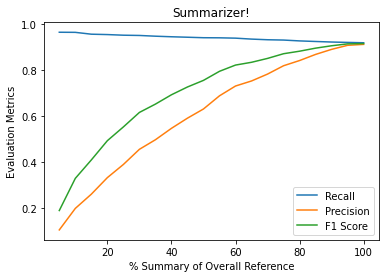

In [ ]:
import matplotlib.pyplot as plt
 
# line 1 points
x1 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y1 = y1=[0.963302752293578, 0.962843295638126,0.9548229548229549,0.9531996179560649,0.950446791226645,0.9493407356002775,0.9461343472750317,0.9436781609195403,0.9416445623342176,0.939514129895885,0.939118582462517,0.9376334899615549,0.9335260115606936,0.930720506730008,0.9293539856441254,0.9256682533870377,0.9231858407079646,0.9207988980716253,0.9191102123356926,0.9175879396984925]
# plotting the line 1 points
plt.plot(x1, y1, label = "Recall")
 
# line 2 points
x2 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y2 = y2=[0.10472074468085106,0.1981382978723404,0.2599734042553192,0.331781914893617,0.38896276595744683,0.45478723404255317,0.496343085106383,0.5458776595744681,0.590093085106383,0.6299867021276596,0.6871675531914894,0.729720744680851,0.7516622340425532,0.7815824468085106,0.8178191489361702,0.8404255319148937,0.8670212765957447,0.8889627659574468,0.9065824468085106,0.9105718085106383]
# plotting the line 2 points
plt.plot(x2, y2, label = "Precision")

# line 3 points
x3 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y3=[0.1889055454576472,0.3286462612993731,0.40867519914434663,0.4922318087464126,0.5520169810166586,0.6149696517227683,0.6511120757303758,0.6916596415234118,0.7255262572703266,0.7542288509158598,0.7936264109387827,0.8207141472557229,0.8327808422037205,0.8496566629092711,0.870026520219315,0.8809897144749693,0.8942225220064643,0.9046008069095312,0.9128033422805701,0.9140664058126884]
# plotting the line 2 points
plt.plot(x3, y3, label = "F1 Score")
 
# naming the x axis
plt.xlabel('% Summary of Overall Reference')
# naming the y axis
plt.ylabel('Evaluation Metrics')
# giving a title to my graph
plt.title('Summarizer!')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

### **Rouge-L Evaluation Metrics**

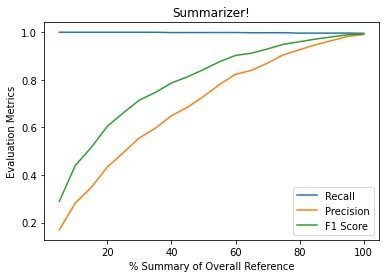

In [ ]:
import matplotlib.pyplot as plt
 
# line 1 points
x1 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y1 = [1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9986522911051213,0.9987228607918263,0.9988009592326139,0.9988789237668162,0.9989373007438895,0.9979188345473465,0.9979919678714859,0.9980694980694981,0.9962335216572504,0.996316758747698,0.9963833634719711,0.9964476021314387,0.9955985915492958]
# plotting the line 1 points
plt.plot(x1, y1, label = "Recall")
 
# line 2 points
x2 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y2 = [0.1690017513134851, 0.2819614711033275, 0.3476357267950963, 0.43345008756567427, 0.4938704028021016, 0.5560420315236427, 0.5963222416812609, 0.648861646234676, 0.68476357267950960, 0.7294220665499125,0.7802101576182137,0.8231173380035026,0.839754816112084,0.8704028021015762,0.9054290718038529,0.9264448336252189,0.9474605954465849,0.9649737302977233,0.9824868651488616,0.9903677758318739]
# plotting the line 2 points
plt.plot(x2, y2, label = "Precision")

# line 3 points
x3 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y3 = [0.28913857430564605,0.4398907069511258,0.5159194243718,0.6047648094646217,0.6611957751753483,0.7146876712652036,0.7471201269708656,0.7866241990470427,0.8124675276414316,0.8431174040283607,0.8761061897658006,0.9025444021516937,0.912030427752207,0.9298409678951592,0.9494949445067926,0.9600725902878943,0.971274680820035,0.9804270412646277,0.9894179844182382,0.9929762899956449]
# plotting the line 2 points
plt.plot(x3, y3, label = "F1 Score")
 
# naming the x axis
plt.xlabel('% Summary of Overall Reference')
# naming the y axis
plt.ylabel('Evaluation Metrics')
# giving a title to my graph
plt.title('Summarizer!')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()